In [3]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [4]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                               
    except:
        return None

In [5]:
# data_filepath = '../data/json_dump/output_4994.json'
data_filepath = '../src/big_json.json'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [6]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[2] at RDD at PythonRDD.scala:53


In [7]:
#remove outer dictionary from every file


In [8]:
df = spark.read.json(data_filepath, multiLine = True)

In [9]:
df.count()

100000

In [10]:
df.show(20)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [11]:
df.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: string (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: strin

In [10]:
# dogs = parts.map(lambda p: Row(id=p[0],
#  age=int(p[1].strip())))

In [11]:
# df.show(10)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [14]:
df_age_gender = df.select('age', 'gender')

In [15]:
df_age_gender.count()

100000

In [16]:
df_clean_age_gender = df_age_gender.na.drop()

In [17]:
df_clean_age_gender.count()

100000

In [18]:
df_clean_age_gender.show()

+-----+------+
|  age|gender|
+-----+------+
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|Female|
|Adult|Female|
|Adult|Female|
|Young|Female|
| Baby|Female|
| Baby|Female|
| Baby|Female|
| Baby|  Male|
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Young|Female|
|Adult|Female|
| Baby|Female|
|Young|  Male|
+-----+------+
only showing top 20 rows



In [19]:
df_clean_age_gender.printSchema()

root
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)



In [20]:
# dropped_df.createOrReplaceTempView("dog_data")
df_clean_age_gender.createOrReplaceTempView("age_gender_data")

In [28]:
df_clean_age_gender.show(20)

+-----+------+
|  age|gender|
+-----+------+
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|Female|
|Adult|Female|
|Adult|Female|
|Young|Female|
| Baby|Female|
| Baby|Female|
| Baby|Female|
| Baby|  Male|
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Young|Female|
|Adult|Female|
| Baby|Female|
|Young|  Male|
+-----+------+
only showing top 20 rows



In [54]:
result = spark.sql('''SELECT gender, 
COUNT(*) AS Count
                        FROM age_gender_data
                        GROUP BY gender
                        ORDER BY COUNT(*) desc''')
result.show()

+------+-----+
|gender|Count|
+------+-----+
|Female|62378|
|  Male|37622|
+------+-----+



In [55]:
plot_age_gender = result.toPandas()
plot_age_gender['gender']
plot_age_gender.dropna(inplace=True)

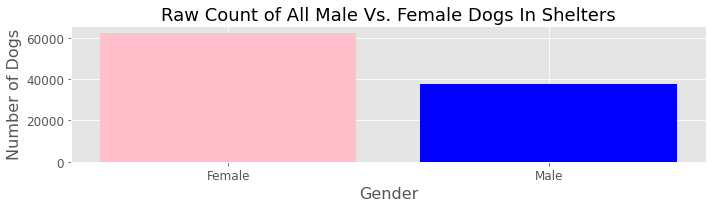

<Figure size 432x288 with 0 Axes>

In [60]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_age_gender['gender'], height=plot_age_gender['Count'], color=['pink', 'blue'])
ax.set_title("Raw Count of All Male Vs. Female Dogs In Shelters", fontsize=18)

ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('Number of Dogs', fontsize=16)
plt.tight_layout()
plt.show();
plt.savefig('../src/readme/raw_counts');

In [ ]:
# stacked bar male and female

In [33]:
# stacked bar plot matplot lib 
# first plot will be 

In [ ]:
# 2 sample t test- arrive younger male vs female